# Radial Permutations
This script aims to convert the coordinates of spatial transcriptomics data from cartesian into radial. After that, it should implement splitting the coordinate system radially into a given N slices and recreate P = perm(N) images consiting of all possible permutations of the N slices.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import colors as mcolors
import random

In [13]:
# cartesian example coordinates
x = [1,1,2,-1,0,-1]
y = [2,0,1,2,-1,-1]
cart = list(zip(x,y))
cart

[(1, 2), (1, 0), (2, 1), (-1, 2), (0, -1), (-1, -1)]

In [14]:
# make cartesian plane
def build_cartesian_plane(x,y,max_quadrant_range=5):
    '''
    This function creates a cartesian plane with a maximum range of max_quadrant_range
    x,y - input data
    inspired by : https://stackoverflow.com/questions/13430231/how-i-can-get-cartesian-coordinate-system-in-matplotlib
    '''
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -max_quadrant_range, max_quadrant_range, -max_quadrant_range, max_quadrant_range
    ticks_frequency = 1

    # Plot points
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x, y)

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    plt.show()







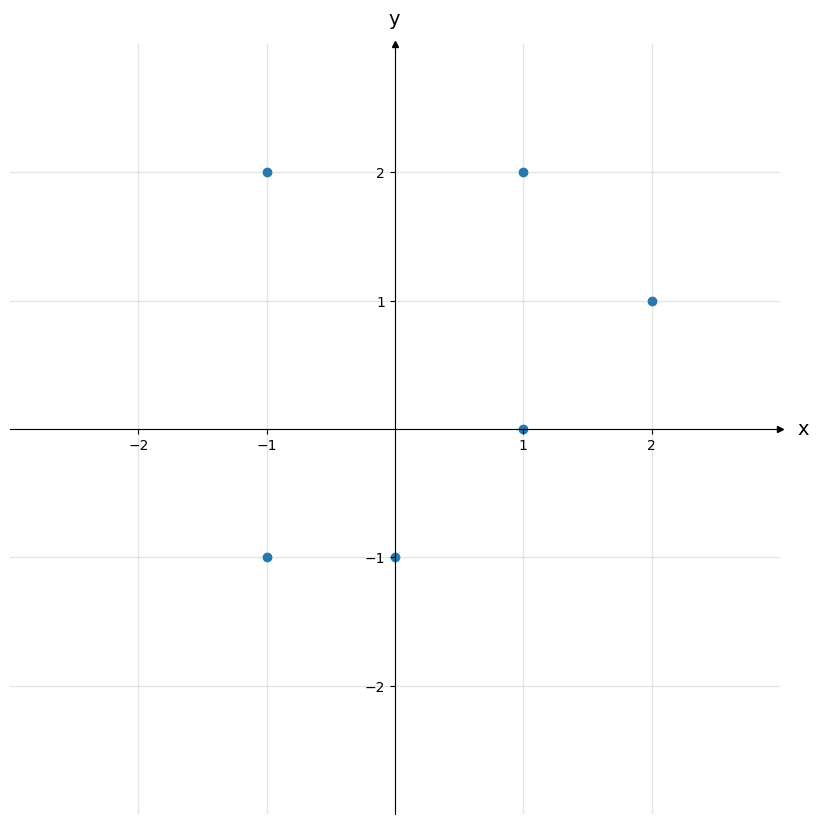

In [15]:
build_cartesian_plane(x,y,2)

In [16]:
# converting cartesian to radial/ spherical coordinates
# https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x) + np.pi # this is two make the interval [0,2pi]
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

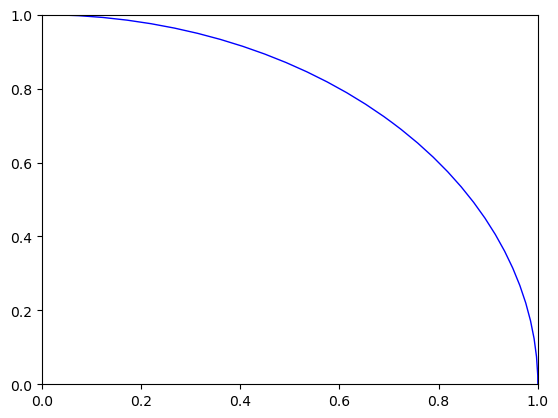

In [17]:
# draw a unit circle
# https://stackoverflow.com/questions/29943871/how-to-draw-an-unit-circle-using-numpy-and-matplotlib
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
ax.add_patch(circ)
plt.show()

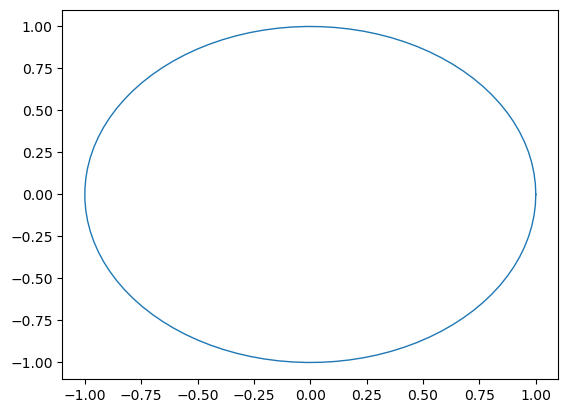

In [18]:
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)
plt.show()

In [49]:
# Adjust cartesian coordinate system to include unit circle
# make cartesian plane
def build_unit_circle(x,y,max_quadrant_range=1):
    '''
    This function creates a unit circle with a radius of max_quadrant_range
    x,y - input data
    inspired by : https://stackoverflow.com/questions/13430231/how-i-can-get-cartesian-coordinate-system-in-matplotlib
    '''
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -max_quadrant_range, max_quadrant_range, -max_quadrant_range, max_quadrant_range
    ticks_frequency = max_quadrant_range/10

    # Plot points
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x, y)

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin-1, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin-1, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax), minor=True)
    ax.set_yticks(np.arange(ymin, ymax), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    # add circle
    t = np.linspace(0,np.pi*2,100)
    ax.plot(max_quadrant_range*np.cos(t), max_quadrant_range*np.sin(t), linewidth=1,color='black')

    plt.show()







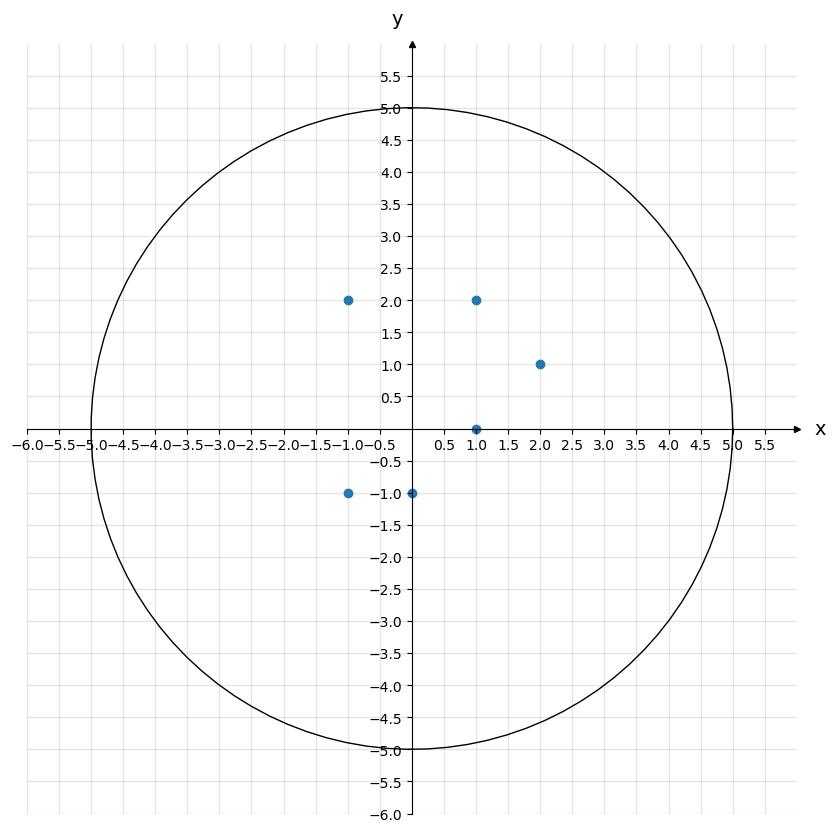

In [50]:
x_check = [0.5,-0.5,0.5,-0.5]
y_check = [0.5,-0.5,-0.5,0.5]

build_unit_circle(x,y,5)

In [51]:
# convert cartesian coordinates to polar coordinartes

cart
pol = [cart2pol(i,j) for (i,j) in cart]

cart, pol


([(1, 2), (1, 0), (2, 1), (-1, 2), (0, -1), (-1, -1)],
 [(2.23606797749979, 4.2487413713838835),
  (1.0, 3.141592653589793),
  (2.23606797749979, 3.6052402625905993),
  (2.23606797749979, 5.176036589385496),
  (1.0, 1.5707963267948966),
  (1.4142135623730951, 0.7853981633974483)])

# Dividing the Coordinate Space into slices
Division is made based on angles. Since polar coordinates are represented as 
$$
(r,\theta) \quad \quad \text{or} \quad \quad (\rho, \theta)
$$
where $\theta$ represents the angle and $\rho$ or $r$ represents the distance to the origin, the coordinates can be filtered based on their second coordinate alone.

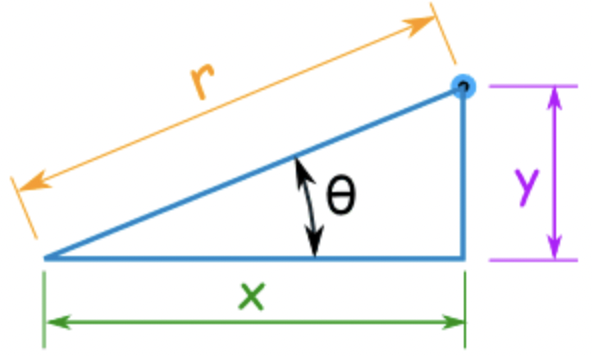


In [22]:
# given N, separate space into slices

N = 6

slices = []
borders = []
start = 0
step = (np.pi*2)/N

t = np.linspace(0,np.pi*2,100)

for i in range(N):
    print(f"Start = {start} \t stop = {step+start}")
    slices.append(np.linspace(start,start+step,100))
    borders.append(start)
    start += step

slices[0][0]
borders



Start = 0 	 stop = 1.0471975511965976
Start = 1.0471975511965976 	 stop = 2.0943951023931953
Start = 2.0943951023931953 	 stop = 3.141592653589793
Start = 3.141592653589793 	 stop = 4.1887902047863905
Start = 4.1887902047863905 	 stop = 5.235987755982988
Start = 5.235987755982988 	 stop = 6.283185307179585


[0,
 1.0471975511965976,
 2.0943951023931953,
 3.141592653589793,
 4.1887902047863905,
 5.235987755982988]

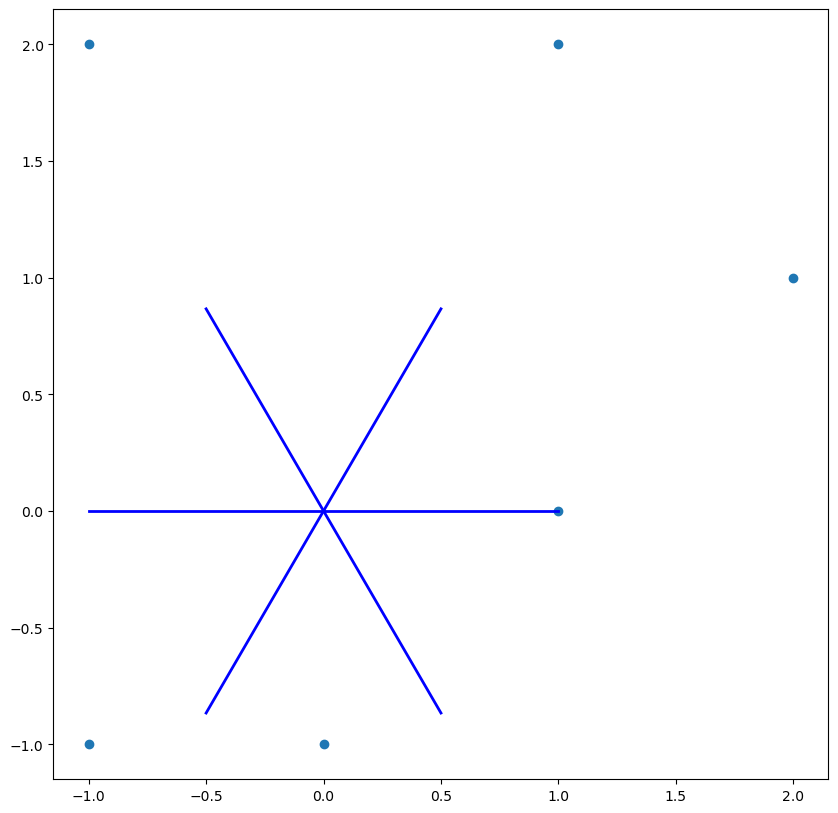

In [23]:
# visualise slices
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y)
for border in borders:
        ax.plot([0, np.cos(border)],[0, np.sin(border)],
                'b-', linewidth=2)
plt.show()

In [82]:
# slightly modify the unit circle function so it can be applied to any plot
def add_unit_circle(ax,max_quadrant_range=1):
    '''
    This function adds a unit circle with a radius of max_quadrant_range to an existing plot
    x,y - input data
    inspired by : https://stackoverflow.com/questions/13430231/how-i-can-get-cartesian-coordinate-system-in-matplotlib
    '''
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -max_quadrant_range, max_quadrant_range, -max_quadrant_range, max_quadrant_range
    ticks_frequency = min(1,max_quadrant_range/5)

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin-1, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin-1, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax), minor=True)
    ax.set_yticks(np.arange(ymin, ymax), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    # add circle
    t = np.linspace(0,np.pi*2,100)
    ax.plot(max_quadrant_range*np.cos(t), max_quadrant_range*np.sin(t), linewidth=1,color='black')

    return ax

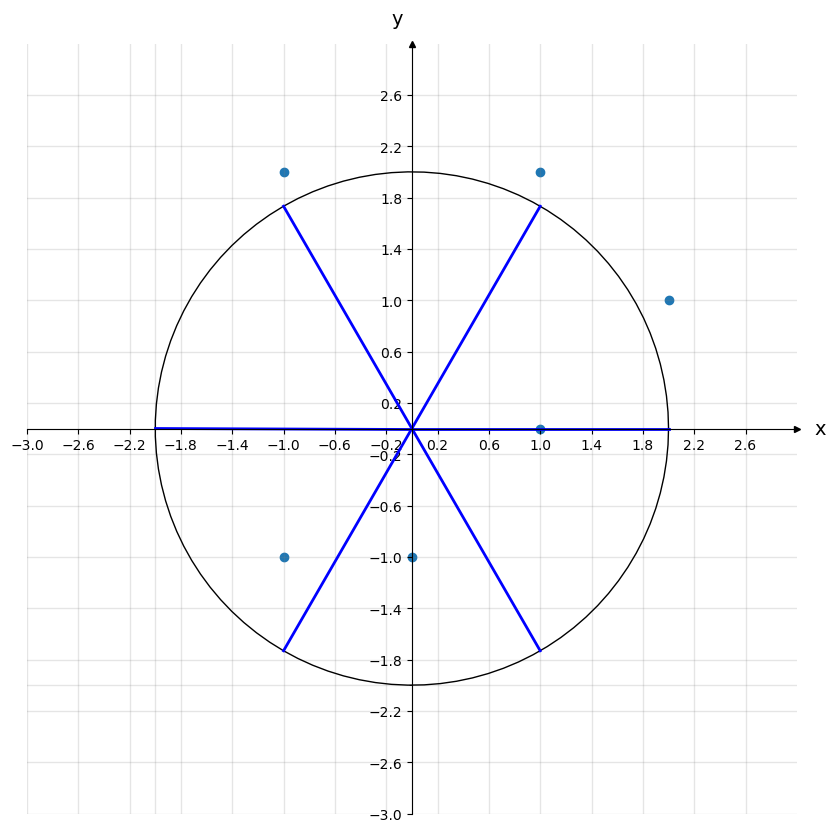

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
rad = 2
ax = add_unit_circle(ax,rad)
ax.scatter(x, y)
for border in borders:
        ax.plot([0, rad*np.cos(border)],[0, rad*np.sin(border)],
                'b-', linewidth=2)
plt.show()

In [61]:
[j for (i,j) in pol]

[4.2487413713838835,
 3.141592653589793,
 3.6052402625905993,
 5.176036589385496,
 1.5707963267948966,
 0.7853981633974483]

radius = 6


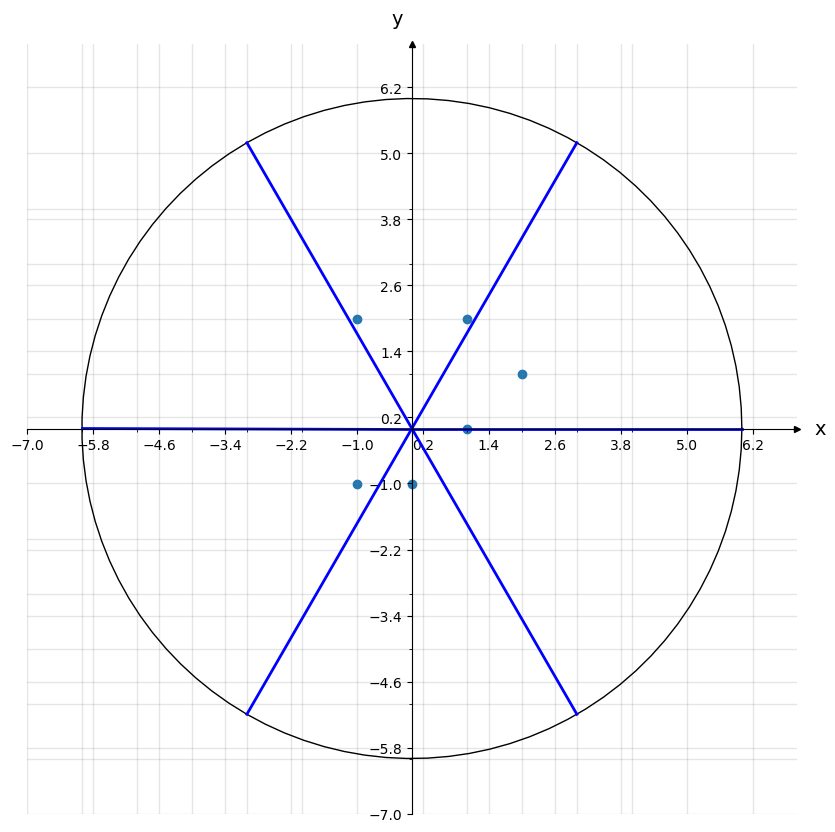

In [62]:
# now show x and y as polar coordinates
fig, ax = plt.subplots(figsize=(10, 10))
rad = math.ceil(max([abs(j) for (i,j) in pol]))
print(f"radius = {rad}")
ax = add_unit_circle(ax,rad)
ax.scatter(x, y)
for border in borders:
        ax.plot([0, rad*np.cos(border)],[0, rad*np.sin(border)],
                'b-', linewidth=2)
plt.show()

In [63]:
# assign the coordinates to a slice
coord_slices = [[] for slice in slices]

for (r,theta) in pol:
    sec = next(x[0] for x in enumerate(borders) if x[1] > theta) - 1
    coord_slices[sec].append((r,theta))
    print(f"entry with theta = {theta:.4} is assigned to section {sec}:\n\tlower bound {float(borders[sec]):.4} and upper bound {float(borders[sec+1]):.4}\n")

coord_slices

entry with theta = 4.249 is assigned to section 4:
	lower bound 4.189 and upper bound 5.236

entry with theta = 3.142 is assigned to section 3:
	lower bound 3.142 and upper bound 4.189

entry with theta = 3.605 is assigned to section 3:
	lower bound 3.142 and upper bound 4.189

entry with theta = 5.176 is assigned to section 4:
	lower bound 4.189 and upper bound 5.236

entry with theta = 1.571 is assigned to section 1:
	lower bound 1.047 and upper bound 2.094

entry with theta = 0.7854 is assigned to section 0:
	lower bound 0.0 and upper bound 1.047



[[(1.4142135623730951, 0.7853981633974483)],
 [(1.0, 1.5707963267948966)],
 [],
 [(1.0, 3.141592653589793), (2.23606797749979, 3.6052402625905993)],
 [(2.23606797749979, 4.2487413713838835),
  (2.23606797749979, 5.176036589385496)],
 []]

In [64]:
colours = list(mcolors.BASE_COLORS.keys())

radius = 6


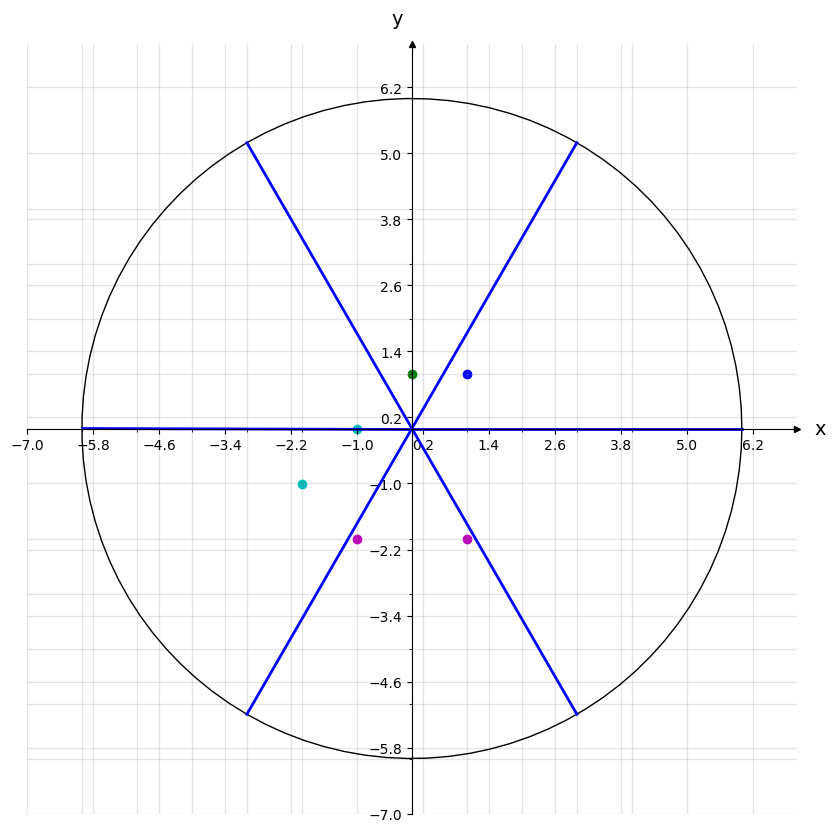

In [65]:
# now show x and y as polar coordinates
fig, ax = plt.subplots(figsize=(10, 10))
rad = math.ceil(max([abs(j) for (i,j) in pol]))
print(f"radius = {rad}")
ax = add_unit_circle(ax,rad)
# ax.scatter(x, y)
for border in borders:
        ax.plot([0, rad*np.cos(border)],[0, rad*np.sin(border)],
                'b-', linewidth=2)
for i in range(len(coord_slices)):
        c = [[a*np.cos(b) for (a,b) in coord_slices[i]],[a*np.sin(b) for (a,b) in coord_slices[i]]]
        ax.scatter(c[0],c[1],color=colours[i])
plt.show()

In [66]:
# convert to function

def partition(x,y,N):
    '''
    This function computes the polar coordinates of 
    given x and y cartesian coordinates.
    It then partitions the radial coordinates into N sections
    and assigns each of the given coordinates to a section.
    The result is visualised in a plot.

    x,y - input cartesian coordinates
    N - number of slices
    '''

    cart = list(zip(x,y))
    pol = [cart2pol(i,j) for (i,j) in cart]

    slices = []
    borders = []
    start = 0
    step = (np.pi*2)/N

    t = np.linspace(0,np.pi*2,100)

    for i in range(N):
        print(f"Start = {start} \t stop = {step+start}")
        slices.append(np.linspace(start,start+step,100))
        start += step
        borders.append(start)


    coord_slices = [[] for slice in slices]

    for (r,theta) in pol:
        sec = next(x[0] for x in enumerate(borders) if x[1] > theta) - 1
        coord_slices[sec].append((r,theta))
        print(f"entry with theta = {theta:.4} is assigned to section {sec}:\n\tlower bound {float(borders[sec]):.4} and upper bound {float(borders[sec+1]):.4}\n")

    colours = list(mcolors.BASE_COLORS.keys())


    # now show x and y as polar coordinates
    fig, ax = plt.subplots(figsize=(10, 10))
    rad = math.ceil(max([abs(i) for (i,j) in pol]))
    print(f"radius = {rad}")
    ax = add_unit_circle(ax,rad)
    # ax.scatter(x, y)
    for border in borders:
            ax.plot([0, rad*np.cos(border)],[0, rad*np.sin(border)],
                    'b-', linewidth=2)
    for i in range(len(coord_slices)):
            c = [[a*np.cos(b) for (a,b) in coord_slices[i]],[a*np.sin(b) for (a,b) in coord_slices[i]]]
            ax.scatter(c[0],c[1],color=colours[i])
    plt.show()

    return pol, coord_slices

Start = 0 	 stop = 1.0471975511965976
Start = 1.0471975511965976 	 stop = 2.0943951023931953
Start = 2.0943951023931953 	 stop = 3.141592653589793
Start = 3.141592653589793 	 stop = 4.1887902047863905
Start = 4.1887902047863905 	 stop = 5.235987755982988
Start = 5.235987755982988 	 stop = 6.283185307179585
entry with theta = 4.249 is assigned to section 3:
	lower bound 4.189 and upper bound 5.236

entry with theta = 3.142 is assigned to section 2:
	lower bound 3.142 and upper bound 4.189

entry with theta = 3.605 is assigned to section 2:
	lower bound 3.142 and upper bound 4.189

entry with theta = 5.176 is assigned to section 3:
	lower bound 4.189 and upper bound 5.236

entry with theta = 1.571 is assigned to section 0:
	lower bound 1.047 and upper bound 2.094

entry with theta = 0.7854 is assigned to section -1:
	lower bound 6.283 and upper bound 1.047

radius = 3


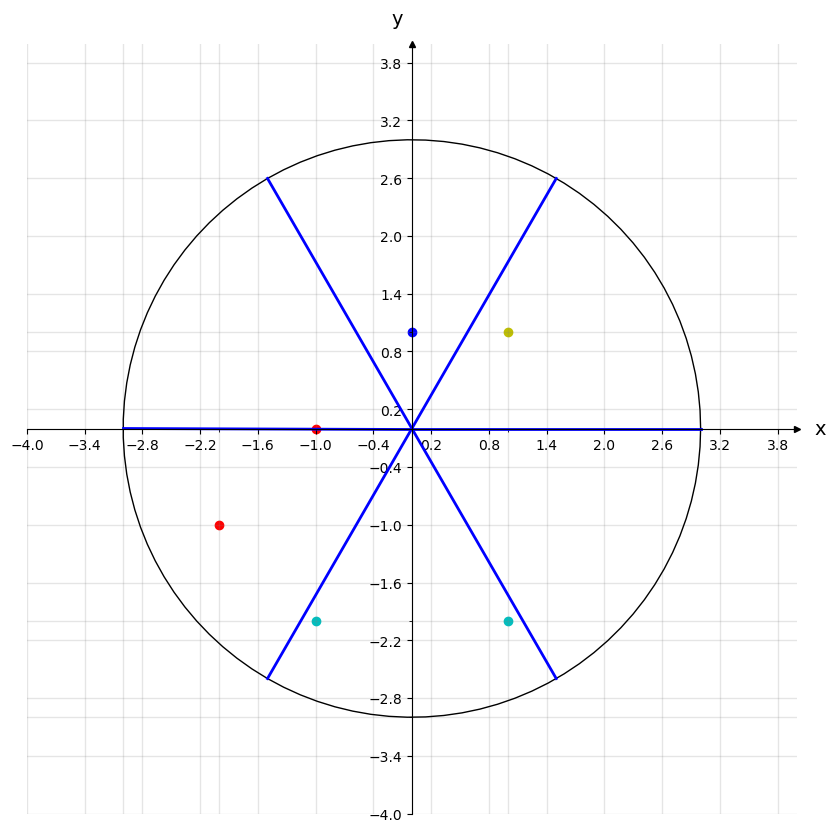

In [67]:
pol, coord_slices = partition(x,y,6)

In [68]:
# test with more coordinates
r = 10
l = 100
test_x = []
test_y = []
for i in range(l):
    test_x.append(r - 2*r*random.random())
    test_y.append(r - 2*r*random.random())

max(test_x),max(test_y)

(9.802533508600193, 9.917708165100116)

Start = 0 	 stop = 1.0471975511965976
Start = 1.0471975511965976 	 stop = 2.0943951023931953
Start = 2.0943951023931953 	 stop = 3.141592653589793
Start = 3.141592653589793 	 stop = 4.1887902047863905
Start = 4.1887902047863905 	 stop = 5.235987755982988
Start = 5.235987755982988 	 stop = 6.283185307179585
entry with theta = 0.8486 is assigned to section -1:
	lower bound 6.283 and upper bound 1.047

entry with theta = 6.222 is assigned to section 4:
	lower bound 5.236 and upper bound 6.283

entry with theta = 1.172 is assigned to section 0:
	lower bound 1.047 and upper bound 2.094

entry with theta = 3.502 is assigned to section 2:
	lower bound 3.142 and upper bound 4.189

entry with theta = 1.035 is assigned to section -1:
	lower bound 6.283 and upper bound 1.047

entry with theta = 2.062 is assigned to section 0:
	lower bound 1.047 and upper bound 2.094

entry with theta = 1.989 is assigned to section 0:
	lower bound 1.047 and upper bound 2.094

entry with theta = 5.958 is assigned t

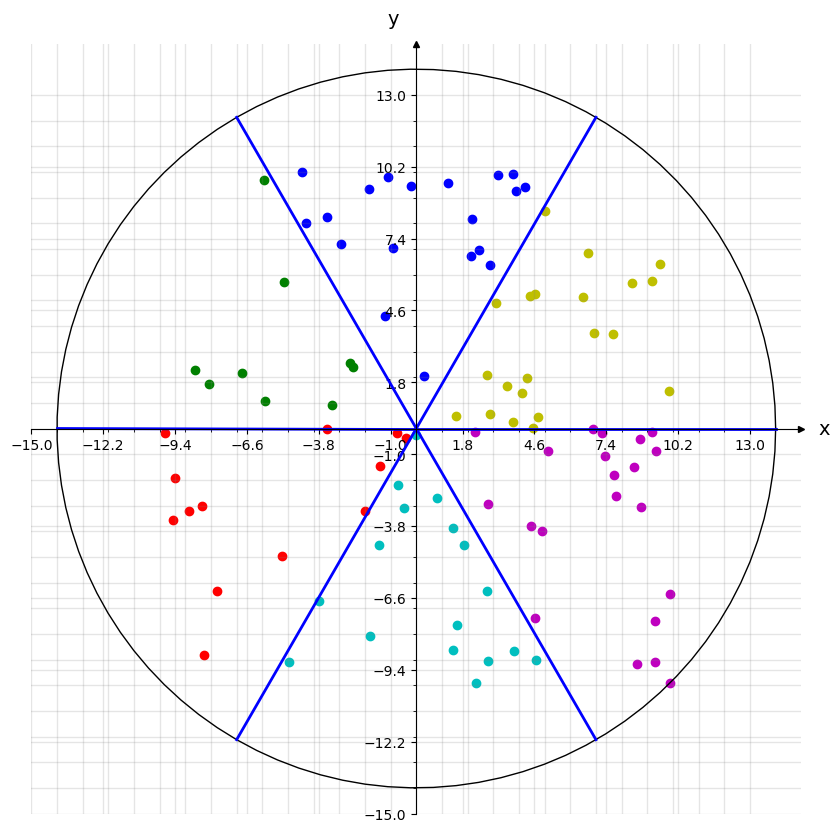

In [69]:
pol_test, coord_slices_test = partition(test_x,test_y,6)

# Implementation of Radial Permutations 
In this section of the script we will explore the permutations of the slices specified previously. 

In [70]:
from itertools import permutations

In [71]:
sections = [i for i in range(N)]
sections

perm = list(permutations(sections))
perm = [list(p) for p in perm]
len(perm)

720

In [72]:
# pick a random permutation
p = np.asarray(perm[502])
p

array([4, 0, 5, 3, 1, 2])

In [73]:
# compute distance to initial
sections = np.asarray(sections)
diff = p - sections
diff

array([ 4, -1,  3,  0, -3, -3])

In [74]:
step

1.0471975511965976

In [75]:
new_coord_slices = [[] for s in coord_slices]
for i in range(len(sections)):
    new_coord_slices[i] = [(r,theta+diff[i]*step) for (r,theta) in coord_slices[i]]


In [76]:
# define a function that can plot the polar coordinates (in slices)
def plotSlices(coord_slices,borders,ax):
        colours = list(mcolors.BASE_COLORS.keys())
        # now show x and y as polar coordinates
        # fig, ax = plt.subplots(figsize=(10, 10))
        pol = []
        for l in coord_slices:
                pol += l 
        rad = math.ceil(max([abs(i) for (i,j) in pol]))
        print(f"radius = {rad}")
        ax = add_unit_circle(ax,rad)
        # ax.scatter(x, y)
        for border in borders:
                ax.plot([0, rad*np.cos(border)],[0, rad*np.sin(border)],
                        'b-', linewidth=2)
        for i in range(len(coord_slices)):
                c = [[a*np.cos(b) for (a,b) in coord_slices[i]],[a*np.sin(b) for (a,b) in coord_slices[i]]]
                ax.scatter(c[0],c[1],color=colours[i])
        return ax
#     plt.show()


radius = 3
radius = 3


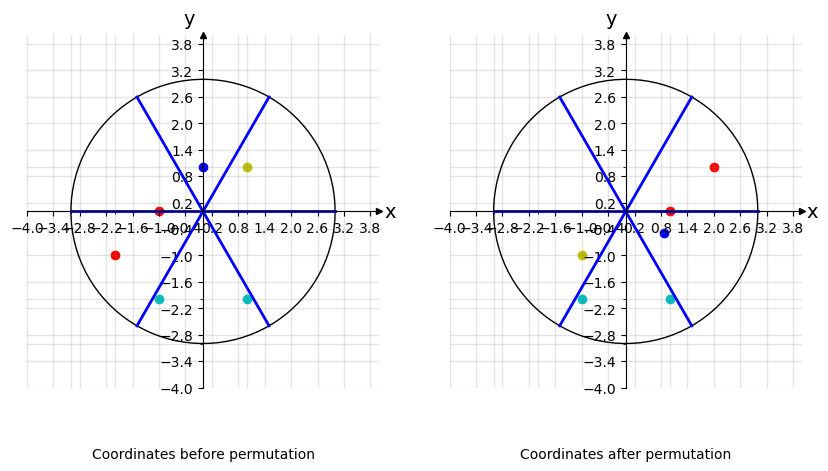

In [77]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))

ax1 = plotSlices(coord_slices,borders,ax1)
ax2 = plotSlices(new_coord_slices,borders,ax2)

# ax1.set_title("Coordinates before permutation")
# ax2.set_title("Coordinates after permutation")

ax1.text(0.5, -0.2, 'Coordinates before permutation', ha='center', transform=ax1.transAxes)
ax2.text(0.5, -0.2, 'Coordinates after permutation', ha='center', transform=ax2.transAxes)


fig.subplots_adjust(top=0.8)

plt.show()


In [78]:
# collect into a function that computes the new coordinate slices as well as plots them

def computePerm(coord_slices,p):
    '''
    compute new coordinates according to slice permutation p 
    Visualise original and reordered coordinates.
    # Paramters
    coord_slices - original coordinates assigned to sections
    p - permutation list containing the indicies of sections in coord_slices
    '''
    N = len(p)
    step = (np.pi*2)/N
    sections = np.asarray([i for i in range(N)])
    diff = p - sections
    new_coord_slices = [[] for s in coord_slices]
    for i in range(len(sections)):
        new_coord_slices[i] = [(r,theta+diff[i]*step) for (r,theta) in coord_slices[i]]
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))

    ax1 = plotSlices(coord_slices,borders,ax1)
    ax2 = plotSlices(new_coord_slices,borders,ax2)

    # ax1.set_title("Coordinates before permutation")
    # ax2.set_title("Coordinates after permutation")

    ax1.text(0.5, -0.2, 'Coordinates before permutation', ha='center', transform=ax1.transAxes)
    ax2.text(0.5, -0.2, 'Coordinates after permutation', ha='center', transform=ax2.transAxes)


    fig.subplots_adjust(top=0.8)

    plt.show()

    return new_coord_slices
        
    

In [79]:
perm[456]

[3, 5, 0, 1, 2, 4]

radius = 3
radius = 3


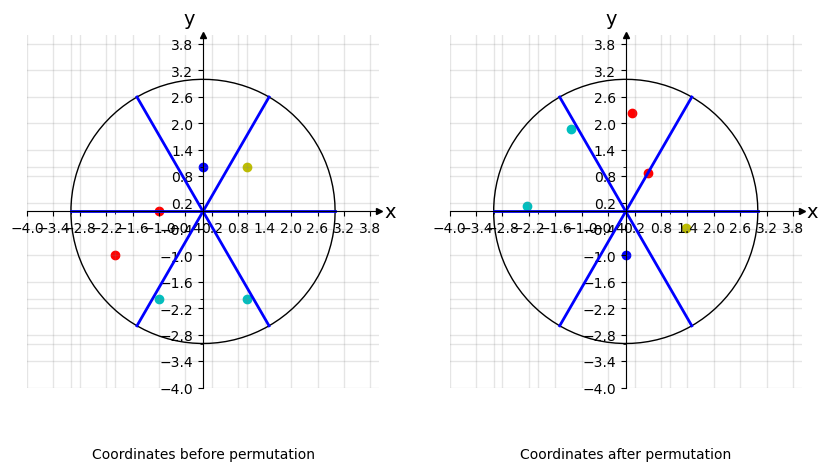

In [80]:
new_coord_slices_456 = computePerm(coord_slices,perm[456])

radius = 14
radius = 14


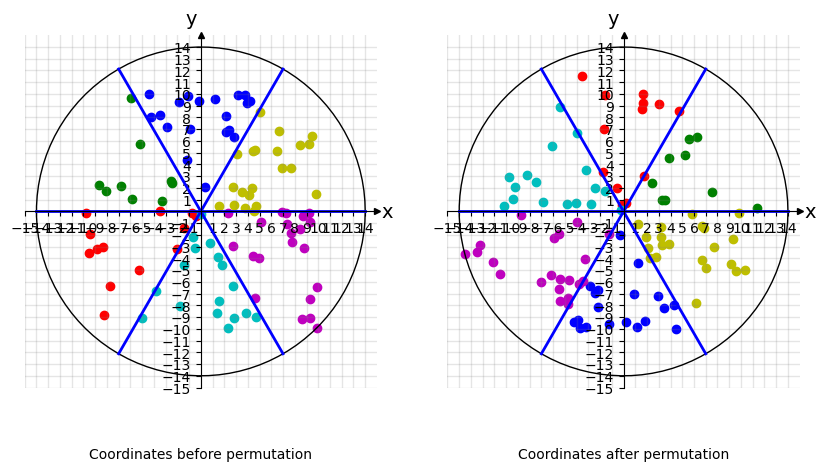

In [83]:
new_coord_slices_test = computePerm(coord_slices_test,perm[456])

# Solve Label Shuffeling Issue
When the points are assigned to  new quadrants, we are loosing information about their initial label (index x and y). The shuffeling thus has to be modified in a way that preserves information about the gene. 

We adjust the test input slightly: instead of working with distinct lists of x and y coordinates or a list of tuples, we will now work with a dictionary.

In [91]:
dict_coord= {}
x,y
names = ["Gene1","Gene2","Gene3","Gene4","Gene5","Gene6"]
for i in range(len(names)):
    dict_coord[names[i]] = (x[i],y[i])
dict_coord

dict_pol = {}
for name,cart in dict_coord.items():
    dict_pol[name] = cart2pol(cart[0],cart[1])

dict_pol


{'Gene1': (2.23606797749979, 4.2487413713838835),
 'Gene2': (1.0, 3.141592653589793),
 'Gene3': (2.23606797749979, 3.6052402625905993),
 'Gene4': (2.23606797749979, 5.176036589385496),
 'Gene5': (1.0, 1.5707963267948966),
 'Gene6': (1.4142135623730951, 0.7853981633974483)}

Now we adjust the functions to suit the new input format

In [98]:
# first: partition
# now instead of the coordinates, the sections are defined by gene 

def partitionGenes(dic,N):

    slices = []
    borders = []
    start = 0
    step = (np.pi*2)/N

    t = np.linspace(0,np.pi*2,100)

    for i in range(N):
        print(f"Start = {start} \t stop = {step+start}")
        slices.append(np.linspace(start,start+step,100))
        start += step
        borders.append(start)

    coord_slices = [[] for slice in slices]
    
    for name,(r,theta) in dic.items():
        print(f"gene,(r,theta)={name},({r,theta})")
        sec = next(x[0] for x in enumerate(borders) if x[1] > theta) - 1
        coord_slices[sec].append(name)
        print(f"entry {name} with theta = {theta:.4} is assigned to section {sec}:\n\tlower bound {float(borders[sec]):.4} and upper bound {float(borders[sec+1]):.4}\n")


    return coord_slices

In [99]:
coord_slices_genes = partitionGenes(dict_pol,6)

Start = 0 	 stop = 1.0471975511965976
Start = 1.0471975511965976 	 stop = 2.0943951023931953
Start = 2.0943951023931953 	 stop = 3.141592653589793
Start = 3.141592653589793 	 stop = 4.1887902047863905
Start = 4.1887902047863905 	 stop = 5.235987755982988
Start = 5.235987755982988 	 stop = 6.283185307179585
gene,(r,theta)=Gene1,((2.23606797749979, 4.2487413713838835))
entry Gene1 with theta = 4.249 is assigned to section 3:
	lower bound 4.189 and upper bound 5.236

gene,(r,theta)=Gene2,((1.0, 3.141592653589793))
entry Gene2 with theta = 3.142 is assigned to section 2:
	lower bound 3.142 and upper bound 4.189

gene,(r,theta)=Gene3,((2.23606797749979, 3.6052402625905993))
entry Gene3 with theta = 3.605 is assigned to section 2:
	lower bound 3.142 and upper bound 4.189

gene,(r,theta)=Gene4,((2.23606797749979, 5.176036589385496))
entry Gene4 with theta = 5.176 is assigned to section 3:
	lower bound 4.189 and upper bound 5.236

gene,(r,theta)=Gene5,((1.0, 1.5707963267948966))
entry Gene5 wi

In [101]:
coord_slices_genes

[['Gene5'], [], ['Gene2', 'Gene3'], ['Gene1', 'Gene4'], [], ['Gene6']]

In [110]:
# now we adjust the plotting function
def plotSlicesGenes(ax,coord_slices,dic,borders):
    colours = list(mcolors.BASE_COLORS.keys())
    # now show x and y as polar coordinates
    # fig, ax = plt.subplots(figsize=(10, 10))
    pol = []
    for l in coord_slices:
            pol += [dic[n] for n in l]  
    print(f"pol = {pol}")
    rad = math.ceil(max([abs(i) for (i,j) in pol]))+1
    print(f"radius = {rad}")
    ax = add_unit_circle(ax,rad)
    
    # add section lines 
    for border in borders:
            ax.plot([0, rad*np.cos(border)],[0, rad*np.sin(border)],
                    'b-', linewidth=2)
    
    # add colour coded coordinates
    for i in range(len(coord_slices)):
            coord = [dic[name] for name in coord_slices[i]]
            c = [[a*np.cos(b) for (a,b) in coord],[a*np.sin(b) for (a,b) in coord]]
            ax.scatter(c[0],c[1],color=colours[i])
    return ax

pol = [(1.0, 1.5707963267948966), (1.0, 3.141592653589793), (2.23606797749979, 3.6052402625905993), (2.23606797749979, 4.2487413713838835), (2.23606797749979, 5.176036589385496), (1.4142135623730951, 0.7853981633974483)]
radius = 4


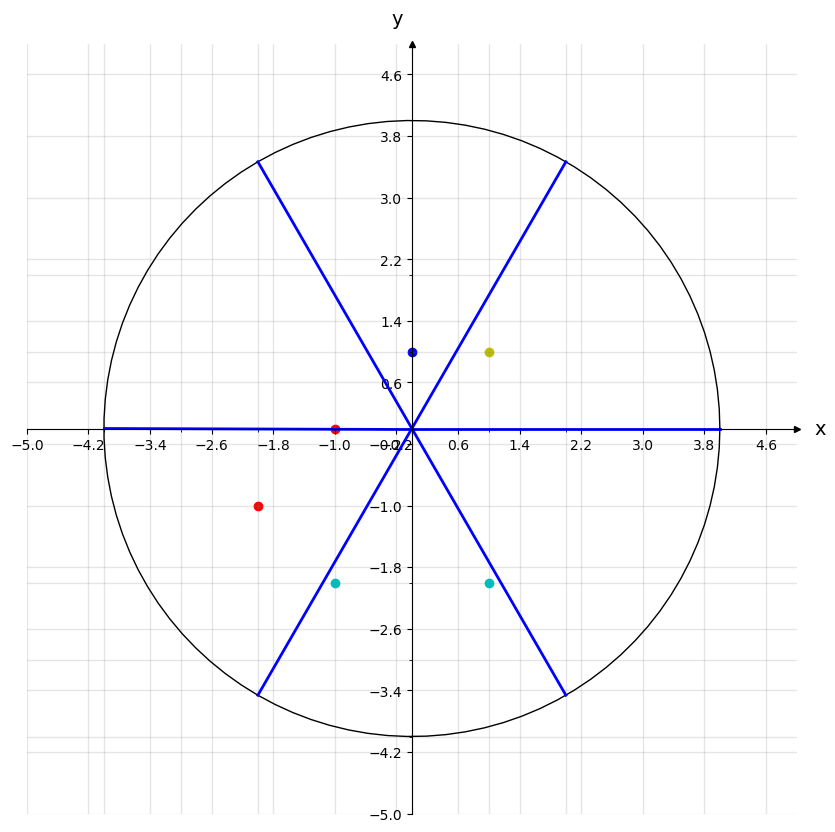

In [112]:
# test the new plot function
fig, ax = plt.subplots(figsize=(10, 10))
plotSlicesGenes(ax,coord_slices_genes,dict_pol,borders)
plt.show()

Finally, we will deal with computing a certain permutation and visualise with the new input

In [124]:
def computePermGenes(dic,coord_slices,p):
    '''
    compute new coordinates according to slice permutation p 
    Visualise original and reordered coordinates.
    # Paramters
    dic - dictionary mapping gene names to inital coordinates
    coord_slices - gene names assigned to sections
    p - permutation list containing the indicies of sections in coord_slices
    '''
    N = len(p)
    step = (np.pi*2)/N
    sections = np.asarray([i for i in range(N)])
    diff = p - sections

    new_coord_slices = [[] for s in coord_slices]
    new_dic_pol = {}


    for i in range(len(sections)):
        # coord = [dic[name] for name in coord_slices[i]]
        new_coord_slices[i+diff[i]] = coord_slices[i]
        for name in coord_slices[i]:
            new_dic_pol[name] = (dic[name][0],dic[name][1]+diff[i]*step)
    
    # fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))

    # ax1 = plotSlices(coord_slices,borders,ax1)
    # ax2 = plotSlices(new_coord_slices,borders,ax2)

    # # ax1.set_title("Coordinates before permutation")
    # # ax2.set_title("Coordinates after permutation")

    # ax1.text(0.5, -0.2, 'Coordinates before permutation', ha='center', transform=ax1.transAxes)
    # ax2.text(0.5, -0.2, 'Coordinates after permutation', ha='center', transform=ax2.transAxes)


    # fig.subplots_adjust(top=0.8)

    # plt.show()

    return new_coord_slices,new_dic_pol

In [131]:
new_coord_slices,new_dic_pol = computePermGenes(dict_pol,coord_slices_genes,perm[456])
for name in dict_pol:
    print(f"{name} has old coordinates {dict_pol[name]} and new coordinates {new_dic_pol[name]}")
    print(f"Change for {name}: {dict_pol[name][1] - new_dic_pol[name][1]}")
diff

Gene1 has old coordinates (2.23606797749979, 4.2487413713838835) and new coordinates (2.23606797749979, 2.1543462689906883)
Change for Gene1: 2.0943951023931953
Gene2 has old coordinates (1.0, 3.141592653589793) and new coordinates (1.0, 1.0471975511965979)
Change for Gene2: 2.0943951023931953
Gene3 has old coordinates (2.23606797749979, 3.6052402625905993) and new coordinates (2.23606797749979, 1.510845160197404)
Change for Gene3: 2.0943951023931953
Gene4 has old coordinates (2.23606797749979, 5.176036589385496) and new coordinates (2.23606797749979, 3.0816414869923006)
Change for Gene4: 2.0943951023931953
Gene5 has old coordinates (1.0, 1.5707963267948966) and new coordinates (1.0, 4.71238898038469)
Change for Gene5: -3.141592653589793
Gene6 has old coordinates (1.4142135623730951, 0.7853981633974483) and new coordinates (1.4142135623730951, -0.26179938779914935)
Change for Gene6: 1.0471975511965976


array([ 4, -1,  3,  0, -3, -3])

In [144]:
p = perm[456]
N = len(p)
step = (np.pi*2)/N
sections = np.asarray([i for i in range(N)])
diff = p - sections
diff

new_coord_slices = [[] for s in coord_slices]
new_dic_pol = {}


for i in range(len(p)):
    # coord = [dic[name] for name in coord_slices[i]]
    new_coord_slices[i] = coord_slices_genes[p[i]]
    for name in coord_slices_genes[i]:
        new_dic_pol[name] = (dict_pol[name][0],dict_pol[name][1]+diff[i]*step)



In [162]:
# for name in dict_pol:
#     print(f"{name} has old coordinates {dict_pol[name]} and new coordinates {new_dic_pol[name]}")
#     print(f"Change for {name}: {(new_dic_pol[name][1] - dict_pol[name][1])//step}")
# diff

# new_coord_slices_genes = partitionGenes(new_dic_pol,6)
# coord_slices_genes,new_coord_slices, new_coord_slices_genes, p

p[0]
names = list(dict_pol.keys())
# new_dic_pol[name][1]
dict_pol
diff
new_dic_pol = {}

for i in range(len(diff)):
    for name in coord_slices_genes[i]:
        new_dic_pol[name] = (dict_pol[name][0],dict_pol[name][1]+diff[i]*step)
        print(f"{name} is moved by {diff[i]} steps from {i}")
        # print(f"Old angle: {dict_pol[name][1]}")
        print(f"Old angle: {dict_pol[name][1]}, new angle: {new_dic_pol[name][1]}")
        print()

new_dic_pol

for name in dict_pol:
    print(f"{name} has old coordinates {dict_pol[name]} and new coordinates {new_dic_pol[name]}")
    print(f"Change for {name}: {(dict_pol[name][1] - new_dic_pol[name][1])//step}")
diff


Gene5 is moved by 3 steps from 0
Old angle: 1.5707963267948966, new angle: 4.71238898038469

Gene2 is moved by -2 steps from 2
Old angle: 3.141592653589793, new angle: 1.0471975511965979

Gene3 is moved by -2 steps from 2
Old angle: 3.6052402625905993, new angle: 1.510845160197404

Gene1 is moved by -2 steps from 3
Old angle: 4.2487413713838835, new angle: 2.1543462689906883

Gene4 is moved by -2 steps from 3
Old angle: 5.176036589385496, new angle: 3.0816414869923006

Gene6 is moved by -1 steps from 5
Old angle: 0.7853981633974483, new angle: -0.26179938779914935

Gene1 has old coordinates (2.23606797749979, 4.2487413713838835) and new coordinates (2.23606797749979, 2.1543462689906883)
Change for Gene1: 2.0
Gene2 has old coordinates (1.0, 3.141592653589793) and new coordinates (1.0, 1.0471975511965979)
Change for Gene2: 2.0
Gene3 has old coordinates (2.23606797749979, 3.6052402625905993) and new coordinates (2.23606797749979, 1.510845160197404)
Change for Gene3: 2.0
Gene4 has old coor

array([ 3,  4, -2, -2, -2, -1])

In [120]:
genes = list(dict_pol.keys())
genes

['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6']

In [123]:
n = 2
genes.insert(0, genes.pop(2))
genes

['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6']